In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1szdCZ98EK59cfJ4jG03g1HOv_OhC1oyN'
file = drive.CreateFile({'id':id})
file.GetContentFile('bank.data.csv')

In [ ]:
import pandas as pd
import numpy as np
churn_d=pd.read_csv('bank.data.csv')
churn_d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_d.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_d.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


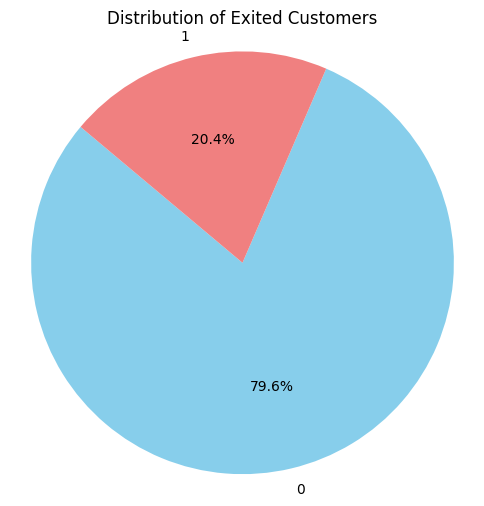

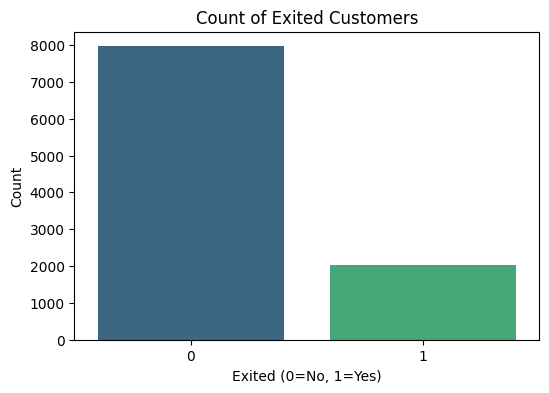

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

exit_counts = churn_d['Exited'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Exited Customers')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=churn_d, palette='viridis')
plt.title('Count of Exited Customers')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()

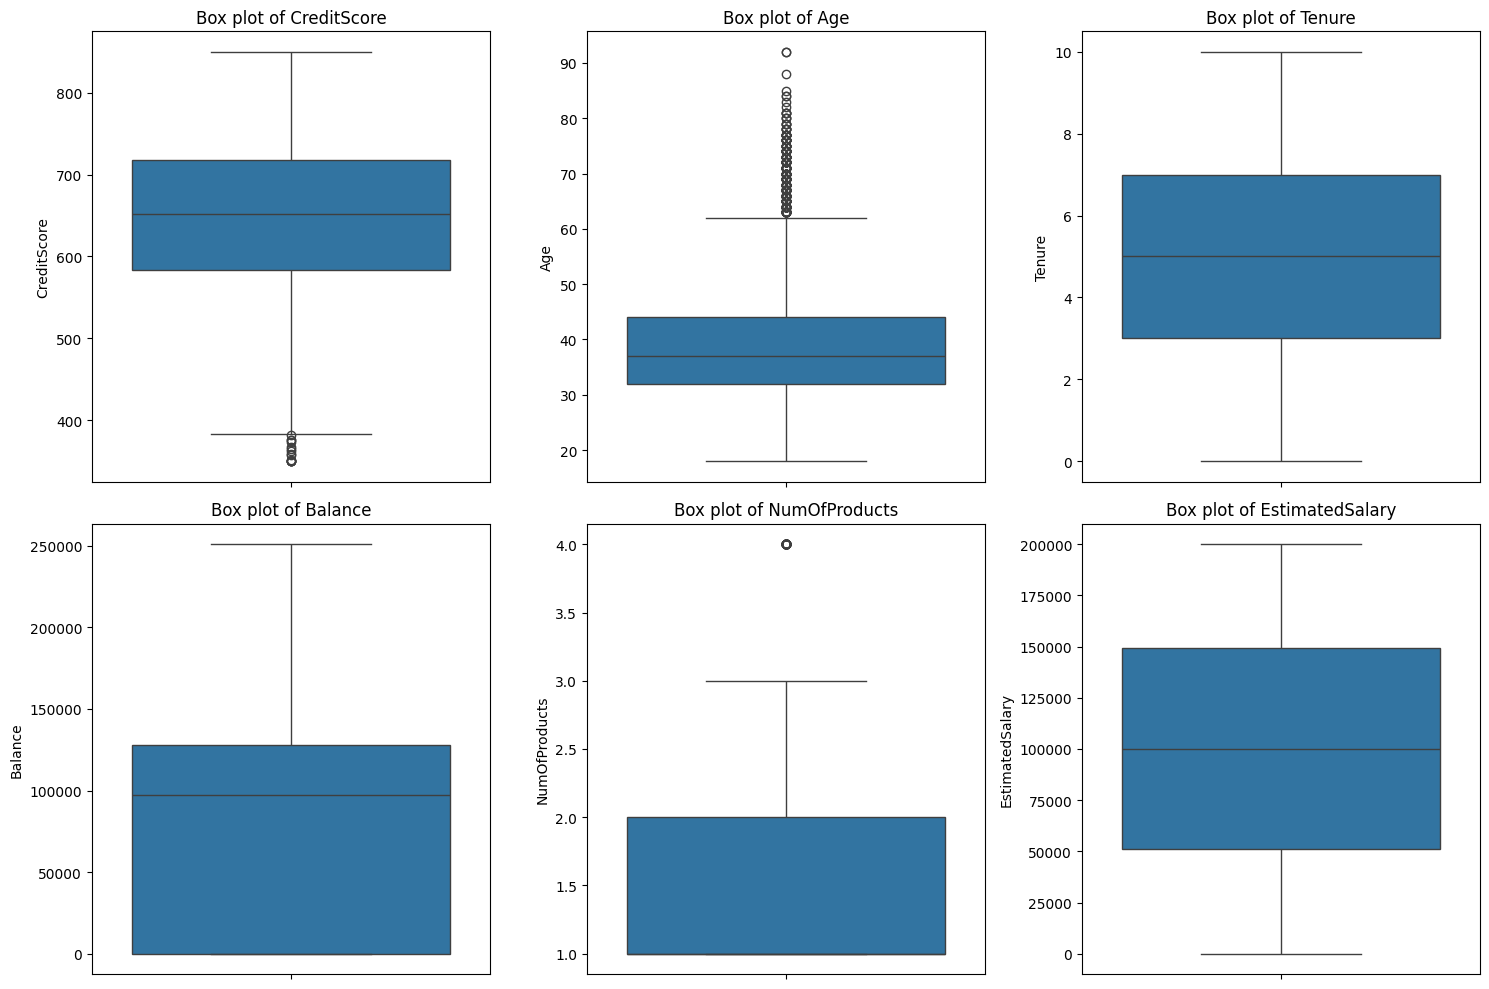

In [ ]:
features_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(y=churn_d[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()




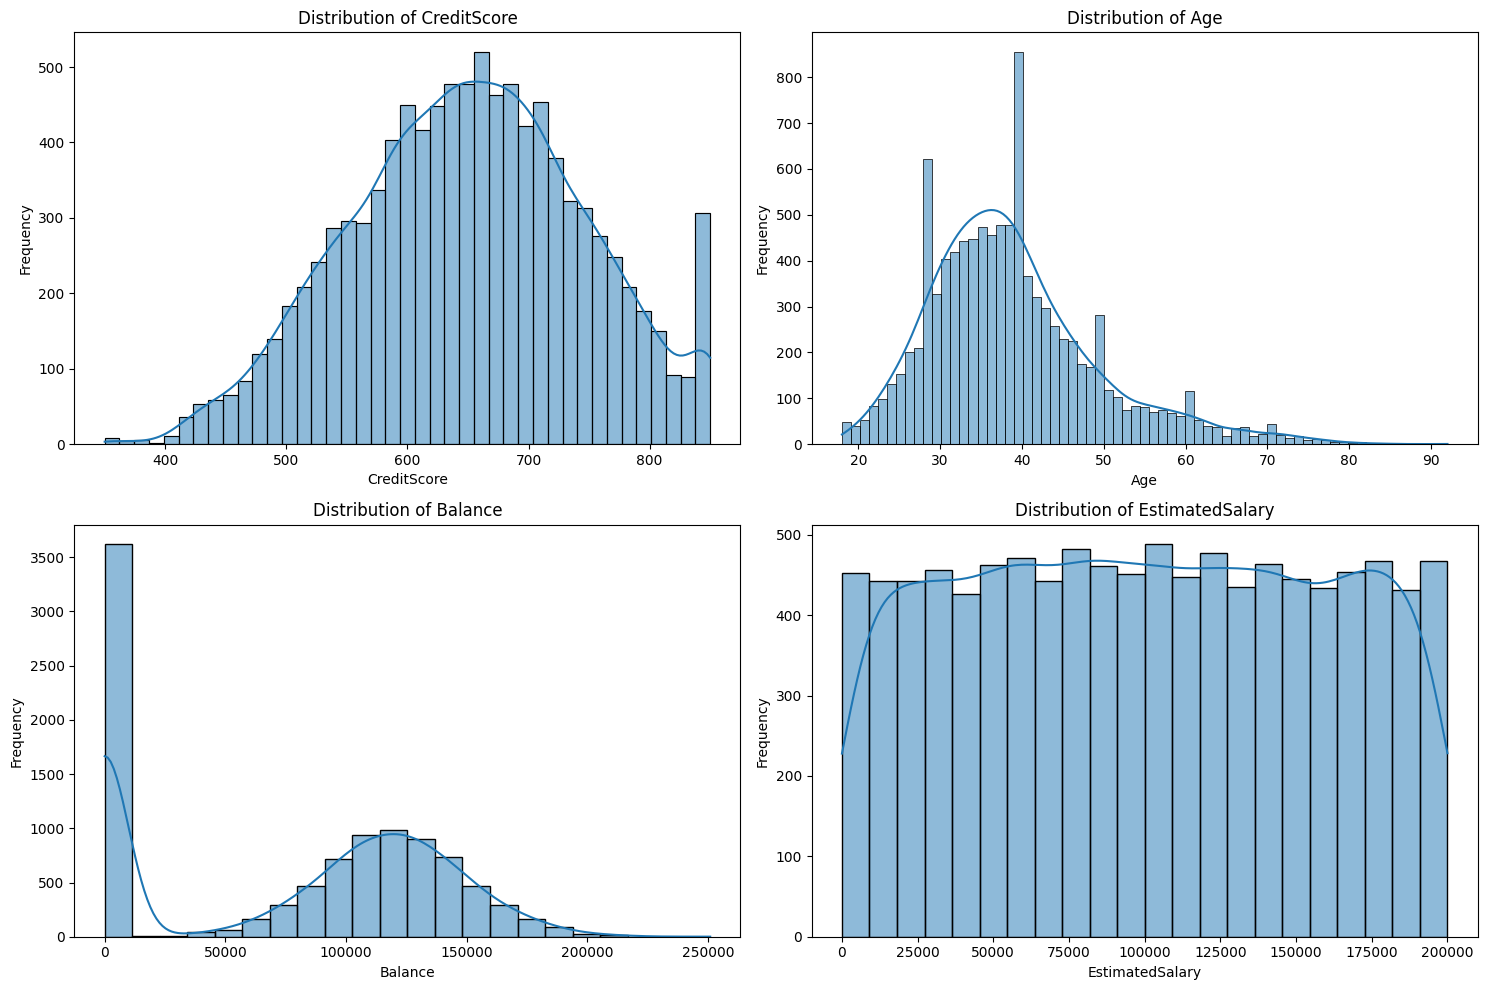

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
  sns.histplot(data=churn_d, x=col, kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

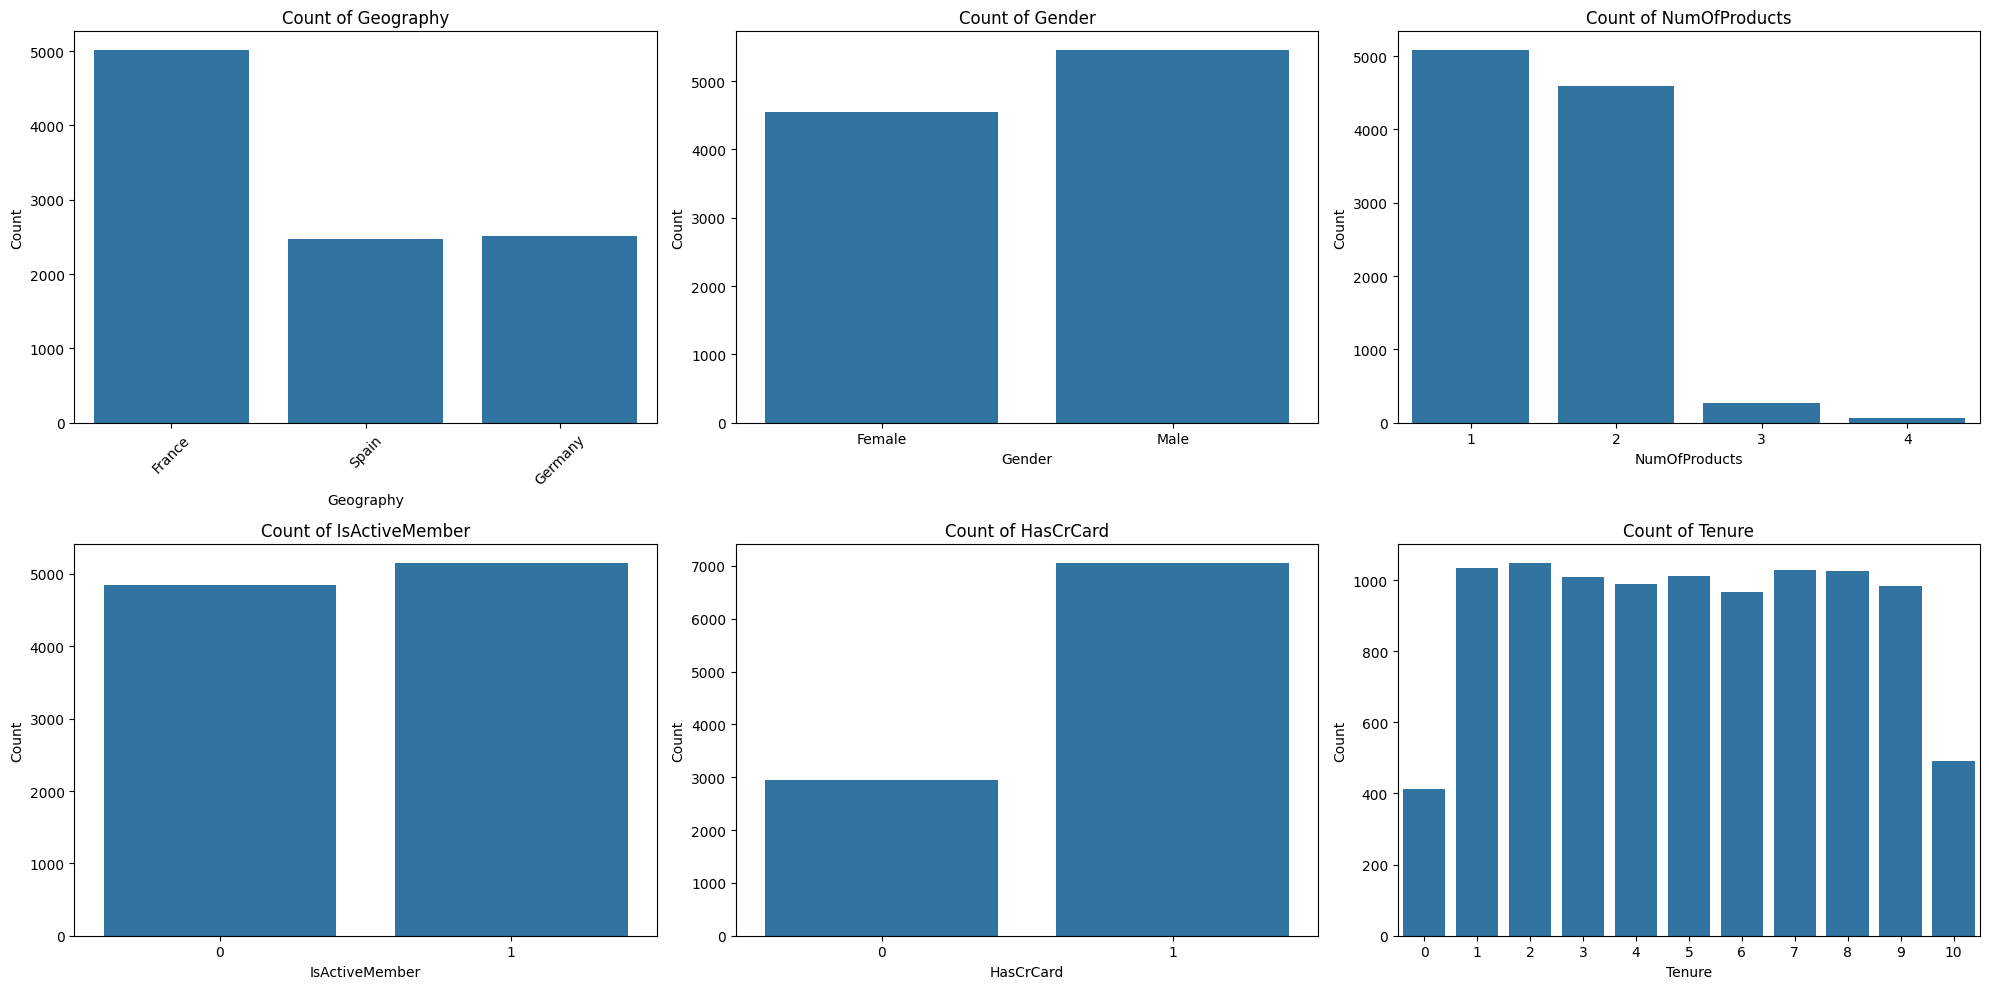

In [ ]:
import matplotlib.pyplot as plt
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Tenure']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=churn_d, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    if col == 'Geography':
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


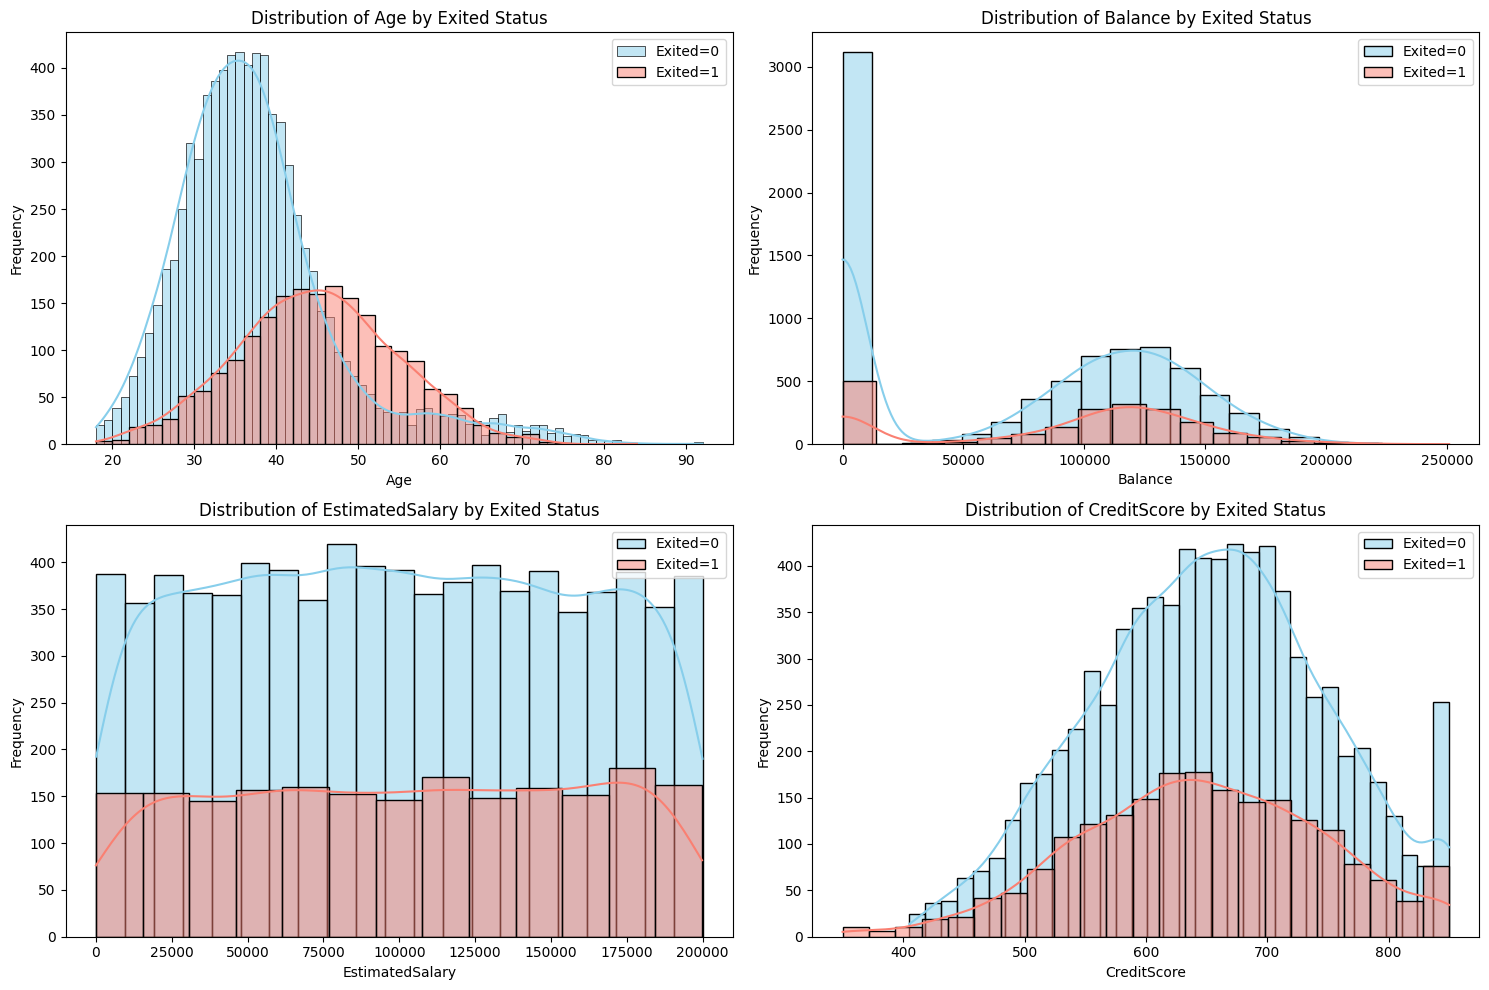

In [ ]:
import matplotlib.pyplot as plt

churned_customers = churn_d[churn_d['Exited'] == 1]
non_churned_customers = churn_d[churn_d['Exited'] == 0]

numerical_features = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(data=non_churned_customers, x=col, kde=True, ax=axes[i], color='skyblue', label='Exited=0')
    sns.histplot(data=churned_customers, x=col, kde=True, ax=axes[i], color='salmon', label='Exited=1')
    axes[i].set_title(f'Distribution of {col} by Exited Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

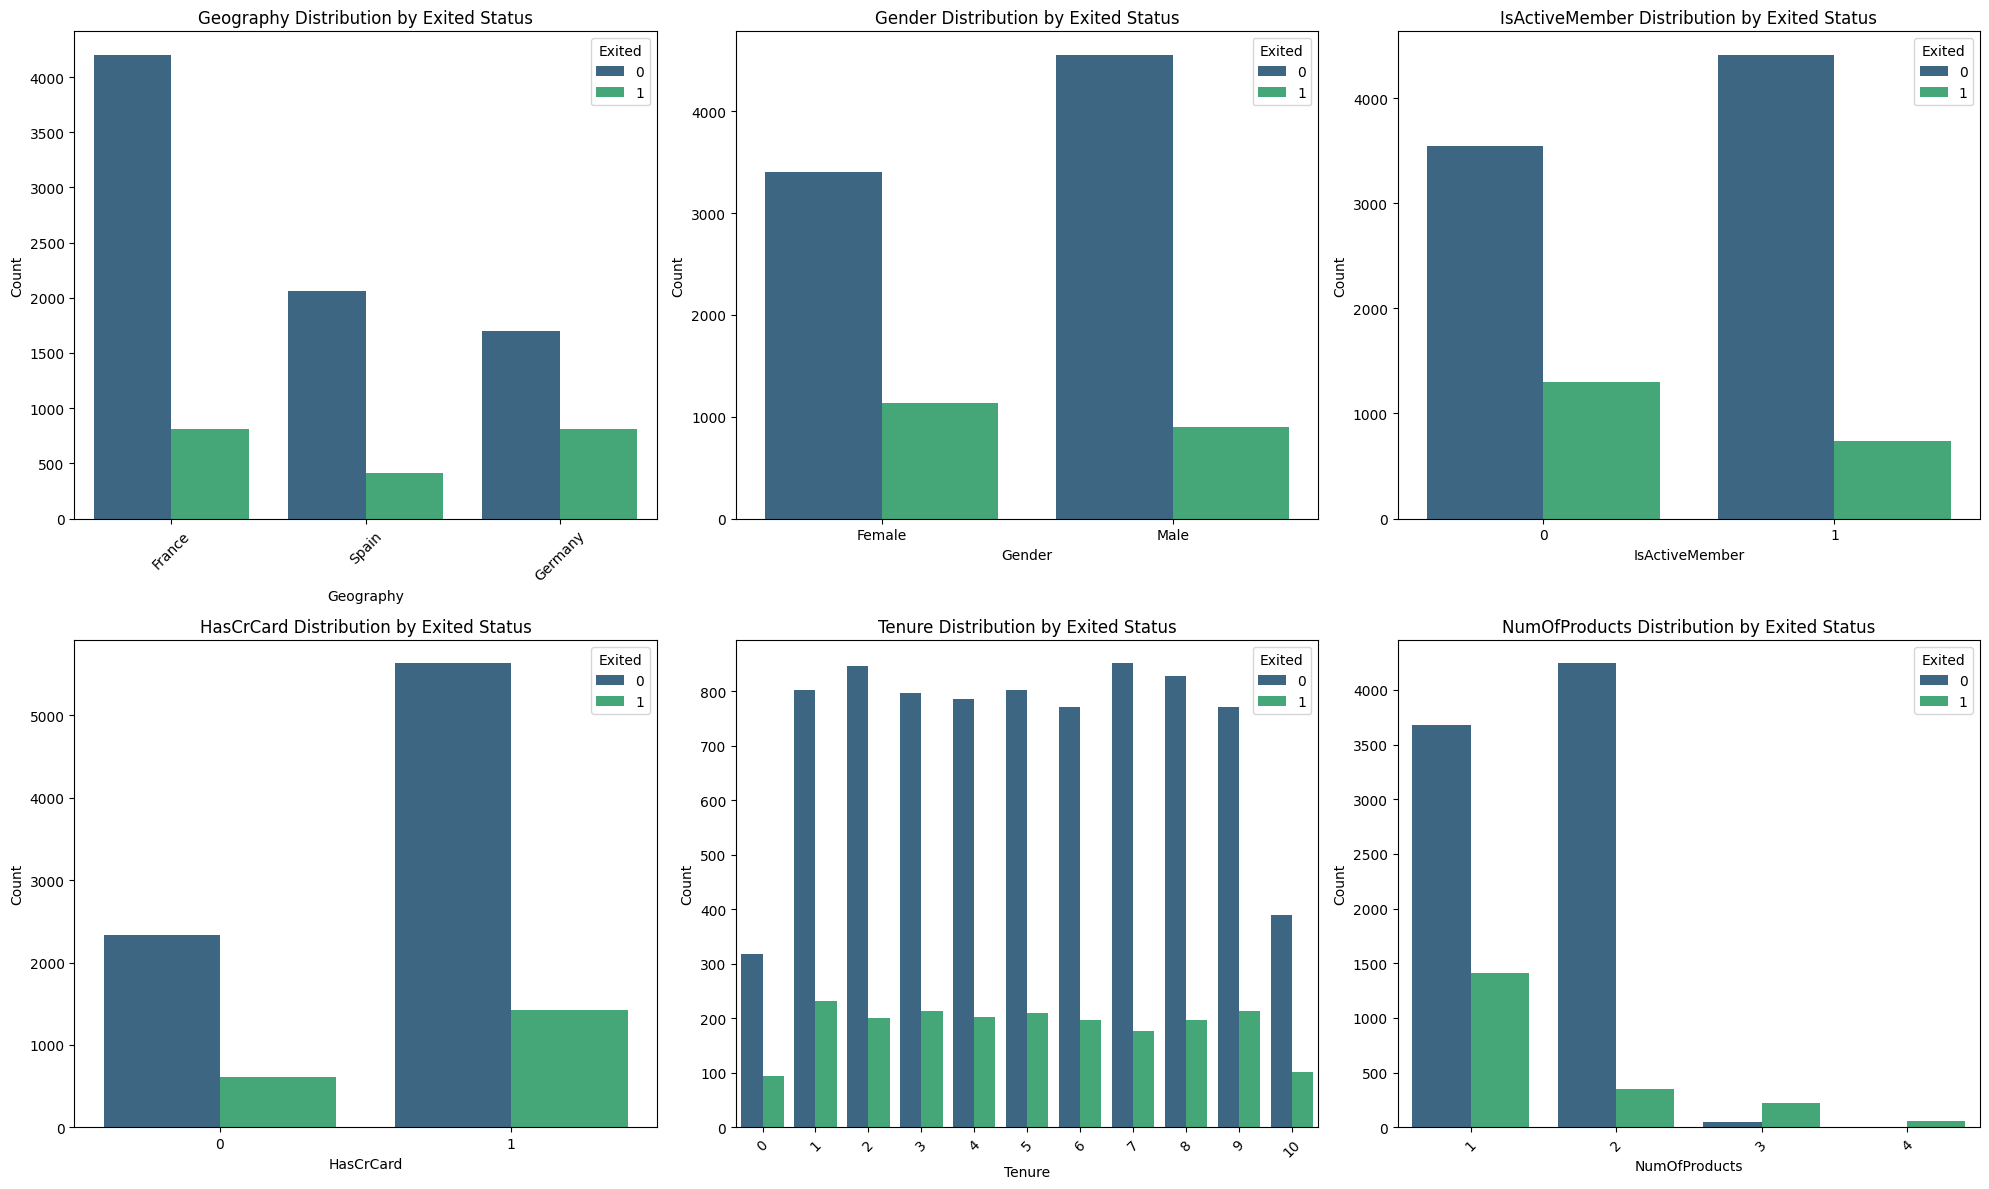

In [ ]:
categorical_features_vs_exited = ['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'Tenure', 'NumOfProducts']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

axes = axes.flatten()

for i, col in enumerate(categorical_features_vs_exited):
    sns.countplot(data=churn_d, x=col, hue='Exited', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} Distribution by Exited Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Exited', loc='upper right')

    if col in ['Geography', 'Tenure', 'NumOfProducts']:
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
churn_d_drop=churn_d.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
churn_d_drop.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [ ]:
churn_d_drop.dtypes
x_numerical=churn_d_drop.columns[(churn_d_drop.dtypes=='int64')|(churn_d_drop.dtypes=='float64')]
x_numerical


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
import pandas as pd
categorical_cols_to_encode = ['Geography', 'Gender', 'IsActiveMember', 'HasCrCard']

churn_d_encoded = pd.get_dummies(churn_d_drop, columns=categorical_cols_to_encode, drop_first=True)

churn_d_encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard_1
0,619,42,2,0.00,1,101348.88,False,False,False,True,True
1,608,41,1,83807.86,1,112542.58,False,True,False,True,False
2,502,42,8,159660.80,3,113931.57,False,False,False,False,True
3,699,39,1,0.00,2,93826.63,False,False,False,False,False
4,850,43,2,125510.82,1,79084.10,False,True,False,True,True


In [ ]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(churn_d_encoded,churn_d['Exited'],test_size=0.25,stratify=y,random_state=42)
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard_1
5866,735,53,8,123845.36,2,170454.93,False,False,False,True,False
1938,518,38,3,90957.81,1,162304.59,False,False,True,True,False
4194,572,54,9,97382.53,1,195771.95,True,False,False,True,True
6332,619,35,4,90413.12,1,20555.21,False,False,False,True,True
1,608,41,1,83807.86,1,112542.58,False,True,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','IsActiveMember_1','HasCrCard_1']

scaler = StandardScaler()

scaler.fit(x_train[numerical_cols_to_standardize])

x_train_numerical_scaled = scaler.transform(x_train[numerical_cols_to_standardize])
x_test_numerical_scaled = scaler.transform(x_test[numerical_cols_to_standardize])

x_train[numerical_cols_to_standardize] = x_train_numerical_scaled
x_test[numerical_cols_to_standardize] = x_test_numerical_scaled

x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard_1
5866,0.874378,1.328762,1.028955,0.761715,0.803861,1.237787,False,False,False,0.967204,-1.554124
1938,-1.371272,-0.092881,-0.699103,0.234517,-0.914771,1.095526,False,False,True,0.967204,-1.554124
4194,-0.812446,1.423538,1.374567,0.337508,-0.914771,1.679687,True,False,False,0.967204,0.643449
6332,-0.326061,-0.377209,-0.353492,0.225786,-0.914771,-1.378660,False,False,False,0.967204,0.643449
1,-0.439896,0.191448,-1.390327,0.119901,-0.914771,0.226947,False,True,False,0.967204,-1.554124
...,...,...,...,...,...,...,...,...,...,...,...
3254,-1.019419,1.044433,-0.353492,0.718917,-0.914771,0.313566,True,False,True,-1.033908,0.643449
4644,0.636360,3.319061,-0.007880,-1.223565,0.803861,0.905641,False,True,True,-1.033908,-1.554124
8942,0.170672,-0.187657,1.374567,-0.072798,0.803861,-0.555157,False,False,False,0.967204,0.643449
2935,0.377644,-0.377209,1.028955,0.395311,0.803861,-1.349126,False,True,True,-1.033908,0.643449


## Build Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty':('l2','l1'),
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_LR = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid,cv=5)
grid_search_LR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ('l2', 'l1')})

In [ ]:
best_LR_model=grid_search_LR.best_estimator_
best_LR_model

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search_KN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_KN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [ ]:
kn_best_model=grid_search_KN.best_estimator_
kn_best_model

KNeighborsClassifier(n_neighbors=11)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, 30]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [ ]:
rf_best_model=grid_search_rf.best_estimator_
rf_best_model

RandomForestClassifier(max_depth=10, n_estimators=300)

## Model Evaluation

### Confusion Matrix

In [ ]:
# confusion matrix, accuracy, precision, recall
from sklearn.metrics import confusion_matrix, classification_report
# evalutate logistic regression using x-test and y-test
y_pred_logistic = best_LR_model.predict(x_test)
y_pred_logistic
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.60      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



In [ ]:
y_pred_knn = kn_best_model.predict(x_test)
y_pred_knn
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1991
           1       0.75      0.37      0.50       509

    accuracy                           0.85      2500
   macro avg       0.80      0.67      0.70      2500
weighted avg       0.83      0.85      0.83      2500



In [ ]:
y_pred_rf = rf_best_model.predict(x_test)
y_pred_rf
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.82      0.48      0.60       509

    accuracy                           0.87      2500
   macro avg       0.85      0.73      0.76      2500
weighted avg       0.87      0.87      0.86      2500



### AUC score

In [ ]:
# draw ROC curve of logistic regression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_prob_logistic = best_LR_model.predict_proba(x_test)[:,1]
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_prob_logistic)

In [ ]:
y_pred_prob_logistic
# the probability of not existing(0) and the probability of existing(1)

array([0.19449591, 0.05305471, 0.2097298 , ..., 0.49178689, 0.23006685,
       0.28440266])

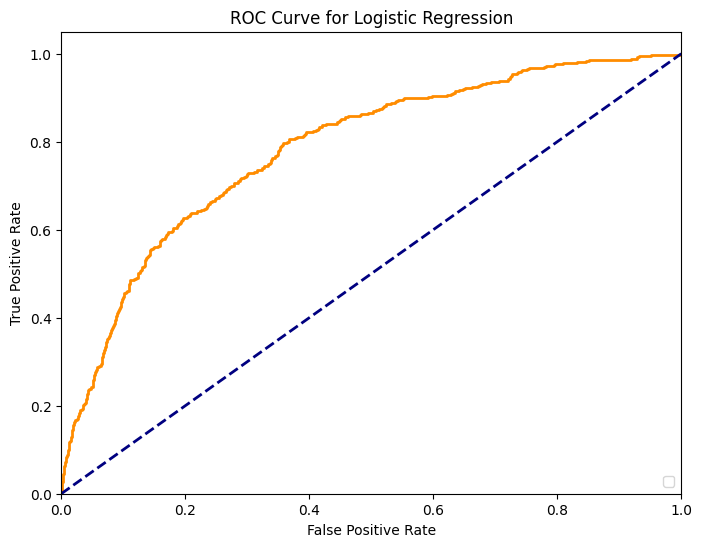

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_LR = auc(fpr_LR, tpr_LR)
auc_LR

np.float64(0.7837163108250388)

In [ ]:
y_pred_prob_KN = kn_best_model.predict_proba(x_test)[:,1]
fpr_KN, tpr_KN, _ = roc_curve(y_test, y_pred_prob_KN)

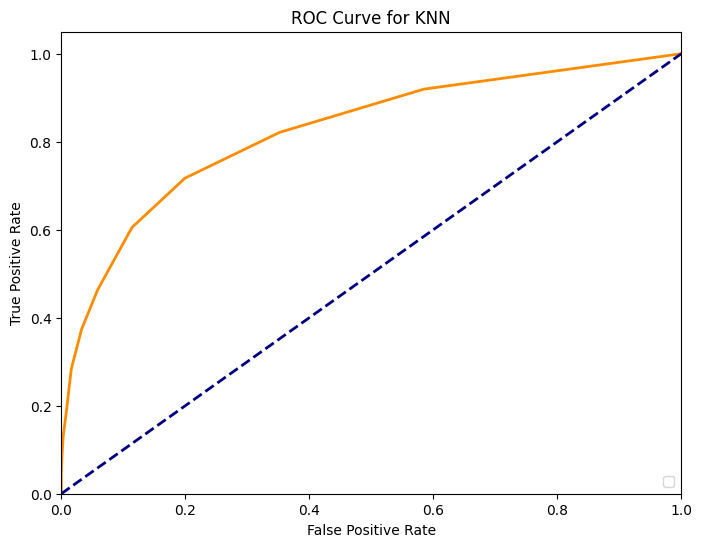

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_KN, tpr_KN, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_KN = auc(fpr_KN, tpr_KN)
auc_KN

np.float64(0.8237565113738741)

In [ ]:
y_pred_prob_rf = rf_best_model.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

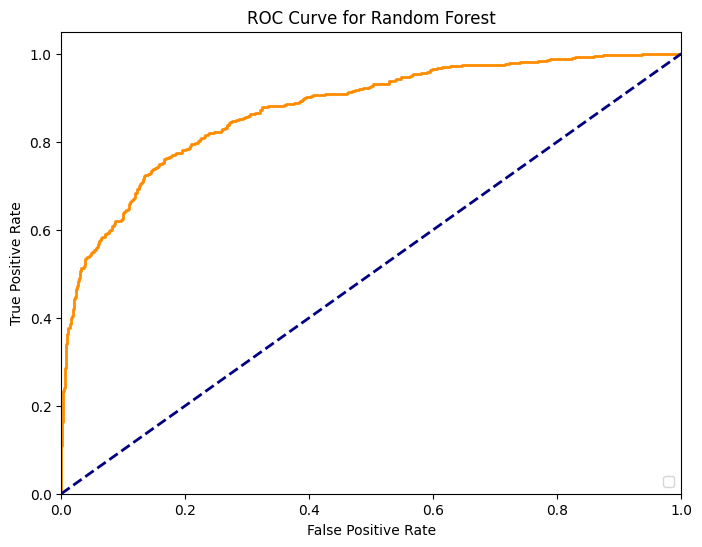

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_rf = auc(fpr_rf, tpr_rf)
auc_rf

np.float64(0.8742711553661418)

### Feature importance

In [ ]:
#rank the importance of feature using logistic regression
feature_importance_logistic = best_LR_model.coef_[0]
best_LR_model.coef_[0]
# feature_importance_logistic

array([-0.08769555,  0.71480718, -0.00373844,  0.16647255, -0.0550656 ,
        0.05712177,  0.76885598,  0.01854283, -0.49615453, -0.50499832,
       -0.02807792])

In [ ]:
churn_d
x_copy=churn_d_encoded.copy()
scaler = StandardScaler()
numerical_cols_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','IsActiveMember_1','HasCrCard_1']
x_copy[numerical_cols_to_standardize] = scaler.fit_transform(x_copy[numerical_cols_to_standardize])
y_copy=churn_d['Exited']
x_copy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard_1
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,False,False,False,0.970243,0.646092
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,False,True,False,0.970243,-1.547768
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,False,False,False,-1.030670,0.646092
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,False,False,False,-1.030670,-1.547768
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,False,True,False,0.970243,0.646092


In [ ]:
best_LR_model.fit(x_copy,y_copy)
indices=np.argsort(best_LR_model.coef_[0])[::-1]
for ind in range(x_copy.shape[1]):
  print ("{0} : {1}".format(x_copy.columns[indices[ind]],round(best_LR_model.coef_[0][indices[ind]], 4)))

Geography_Germany : 0.767
Age : 0.7611
Balance : 0.1647
EstimatedSalary : 0.0269
Geography_Spain : 0.0268
HasCrCard_1 : -0.0196
Tenure : -0.0453
NumOfProducts : -0.0582
CreditScore : -0.0638
Gender_Male : -0.5268
IsActiveMember_1 : -0.536


In [ ]:
rf_best_model.fit(x_copy,y_copy)
importances=rf_best_model.feature_importances_
indices=np.argsort(importances)[::-1]
for ind in range(x_copy.shape[1]):
  print ("{0} : {1}".format(x_copy.columns[indices[ind]],round(importances[indices[ind]], 4)))

Age : 0.3198
NumOfProducts : 0.2332
Balance : 0.1072
CreditScore : 0.0761
EstimatedSalary : 0.0724
IsActiveMember_1 : 0.0707
Geography_Germany : 0.046
Tenure : 0.0393
Gender_Male : 0.0184
HasCrCard_1 : 0.0092
Geography_Spain : 0.0078


## Result Summary

Geography , age , num of products most likely determine whether the customer churn or not